In [131]:
###### valido para Julia 1.7.2
using LinearAlgebra
#using Plots
using Graphs #paquetería para graphos
using Random
using GraphPlot #paqueteria para graficar redes
using SparseArrays
# using PlotlyJS
using CairoMakie


In [132]:
F(theta,i,j,k)=exp(im*theta*i*j/k) #son las entradas de la matriz, las exponenciales

function Coin_Fourier(k,theta=2*pi)   #genera la matriz
    Cki=zeros(Complex,k,k)
    Cki[1,:].=1                # se le agrega 1's a la primera fila
    Cki[:,1].=1                # se le agrega 1's a la primera columna
    for i=1:k-1                #  En este for se va a recorrer cada fila y columna
        for j=1:k-1               ## junto con este otro for
            Cki[j+1,i+1]=F(theta,i,j,k) # se utiliza la función F que se definio arriba
        end
    end
   return (1/sqrt(k))*Cki  # se le multiplica por el 1/sqrt(grado) al que corresponde 
end

## Neceisto algo que si le doy un nodo me diga que base se le asigna###
function Base_del_Nodo(Nodo,A)
    k=sum(A[Nodo,:]) # Sumamos cada entrada eso nos dará el grado del nodo
    Id=Matrix(1I, k, k) # generamos la matriz identidad que corresponde al grado
    return Id #La retorna
              ## Esto genera la base segun sea el grado de cada nodo
end

Base_del_Nodo (generic function with 1 method)

In [133]:
function U_evolution(n,A,ψ)
    #ψ_mean=sparse(zeros(Float64,size(A)))
    ### Para ver que vectores hay hay que recorrer cada uno... PARA UNA MATRIZ ψ DADA
    for t=1:n
        for i=1:size(A)[1]   #PAra un nodo i me va a dar el vector que le corresponde Ö

            if rowvals(ψ[i,:])==[]       # si no hay ningún peso entonces continua
               continue 
            else
               #println(ψ[i,:]) 
            end

            Nodos_de_i=rowvals(A[i,:])   # nodos de i
            Basis=Base_del_Nodo(i,A)     # base del nodo i


            v=zeros(length(Nodos_de_i)) # el vector del nodo i
            for (index,value) in enumerate(Nodos_de_i)   # hacemos dos indices uno que enlista los elemntos y otro los nodos conectados al nodos 1
            v+=Basis[:,index]*ψ[i,value]
            end


            #Al vector le aplicamos el operador moenda
            k=sum(A[i,:])  # calculamos
            v=Coin_Fourier(k)*v  ## El vector despues de la moenda de Fourier 


            ## Hay que reemplazar los pesos (SEGUIMOS EN EL NODO 1)
            for (index,value) in enumerate(Nodos_de_i)   # hacemos dos indices uno que enlista los elemntos y otro los nodos conectados al nodos 1
                ψ[i,value]=v[index]
            end
        end
        ### operador S### es solo el trasnpuesto de la matriz ψ
        ψ=sparse(transpose(ψ))
        #ψ_mean+=abs2.(Matrix(ψ))
    end
    #return ψ_mean*(1/n)
    return ψ
end

U_evolution (generic function with 1 method)

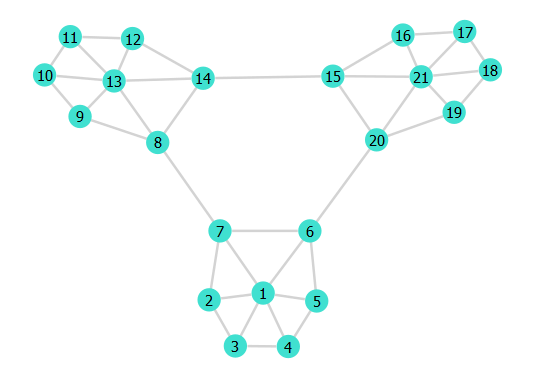

In [134]:
#Red de prueba

g = SimpleGraph(21)  #defeinimos nodos de 1 al 3

#Grupo1
add_edge!(g,1,2) 
add_edge!(g,1,3)
add_edge!(g,1,4)
add_edge!(g,1,5)
add_edge!(g,1,6)
add_edge!(g,1,7)
add_edge!(g,2,3)
add_edge!(g,3,4)
add_edge!(g,4,5)
add_edge!(g,5,6)
add_edge!(g,6,7)
add_edge!(g,7,2)
add_edge!(g,7,8)
add_edge!(g,6,20)

#Grupo2
add_edge!(g,13,8)
add_edge!(g,13,9)
add_edge!(g,13,10)
add_edge!(g,13,11)
add_edge!(g,13,12)
add_edge!(g,13,14)
add_edge!(g,8,9)
add_edge!(g,9,10)
add_edge!(g,10,11)
add_edge!(g,11,12)
add_edge!(g,12,14)
add_edge!(g,14,8)
add_edge!(g,14,15)

#Grupo3
add_edge!(g,21,15)
add_edge!(g,21,16)
add_edge!(g,21,17)
add_edge!(g,21,18)
add_edge!(g,21,19)
add_edge!(g,21,20)
add_edge!(g,20,15)
add_edge!(g,15,16)
add_edge!(g,16,17)
add_edge!(g,17,18)
add_edge!(g,18,19)
add_edge!(g,19,20)

#Ellos mismos-- me suena raro
# for i=1:21
#     add_edge!(g,i,i)
# end



gplot(g, nodelabel=1:21)   #graficamos la red

In [135]:
A=adjacency_matrix(g)

21×21 SparseMatrixCSC{Int64, Int64} with 78 stored entries:
⡮⡫⡉⠃⠀⠀⠀⠀⠀⠀⠀
⠧⠈⠪⡢⡀⠀⣀⠀⠀⠐⠀
⠀⠀⠀⠈⠪⡢⣇⠀⠀⠀⠀
⠀⠀⠀⠘⠉⠙⠪⡢⡀⠠⡄
⠀⠀⢀⠀⠀⠀⠀⡈⠪⡢⡇
⠀⠀⠀⠀⠀⠀⠀⠉⠉⠉⠀

In [136]:
ψ=sparse(zeros(Complex,size(A)))

# Norm=1/sqrt(sum(A))
# for i=1:21
#     ψ[i,:]=A[i,:]*Norm
# end

ψ[1,2]=1

1

In [137]:
ψ

21×21 SparseMatrixCSC{Complex, Int64} with 1 stored entry:
⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀

In [138]:
B=U_evolution(10,A,ψ);
BB=abs2.(Matrix(B));

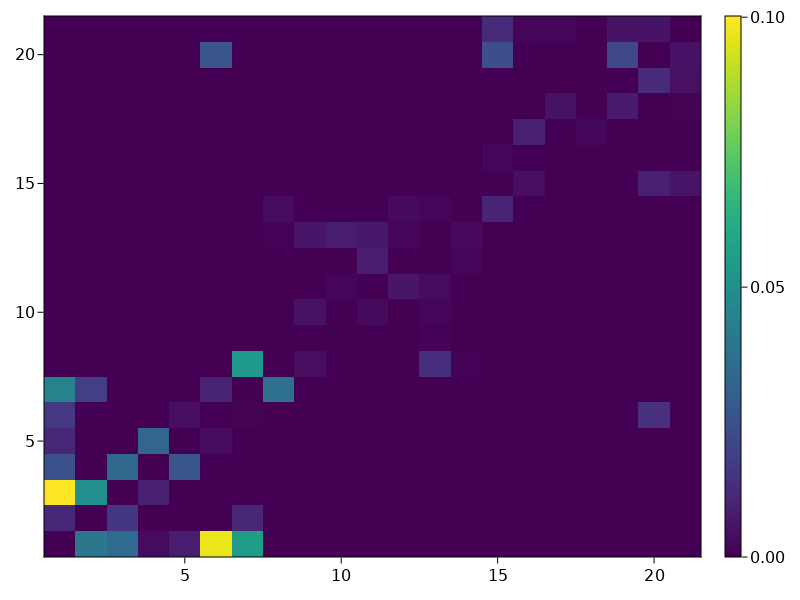

In [139]:
fig, ax, hm = heatmap(BB)
Colorbar(fig[:, end+1], hm)
fig

In [149]:
###Proba de transición## p(i-->l;t)
function proba_de_transicion(i0,lf,t)
    ki=sum(A[i0,:]) # El grado ki
    kl=sum(A[lf,:])

    
    p=0 # Colocaremos las sumas de las probas
    
    #Bloque a aplicar
    for i in rowvals(A[i0,:])
        for l in rowvals(A[lf,:])

            ψ=sparse(zeros(Complex,size(A))) # definimos el estado con ceros
            ψ[i0,i]=1                        # Escogemos uno en particular el |i0-->i>
            Ut=U_evolution(t,A,ψ)           # Lo hacemos evolucionar
            p+=abs2(Ut[lf,l])                   # solo escogemos el que coincida con <l0-->l|
        end
    end
    return p=p/(ki*kl)
end

proba_de_transicion (generic function with 1 method)

In [150]:
proba_de_transicion(1,1,10)

0.03094934297999847

In [151]:
function time_avar_proba_trans(i0,lf,t)
    p=0
    for i=1:t
        p+=proba_de_transicion(i0,lf,t)
    end
    return p=p/t
end

time_avar_proba_trans (generic function with 1 method)

In [152]:
time_avar_proba_trans(1,1,10)

0.03094934297999847

In [153]:
proba=zeros(21,21);
t=10
for i=1:21
    for l=1:21
        proba[i,l]=time_avar_proba_trans(i,l,t)
    end
end

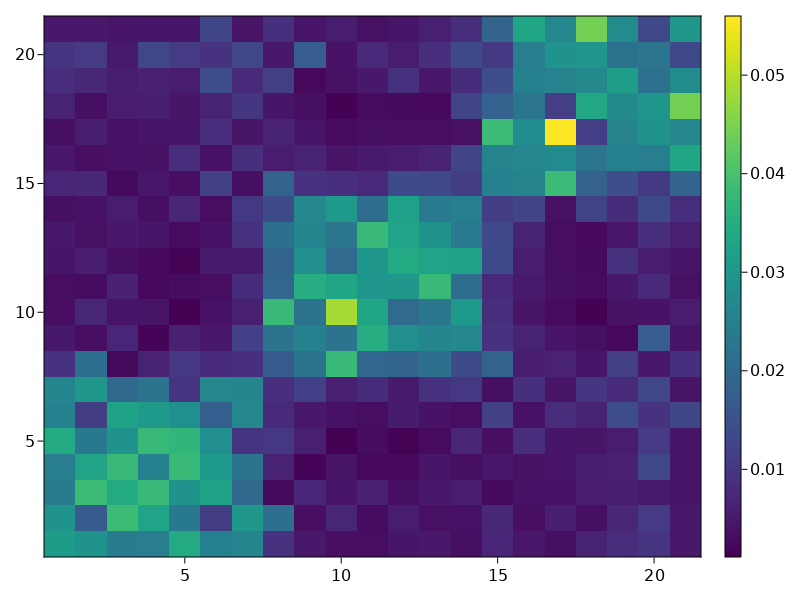

In [154]:
fig, ax, hm = heatmap(transpose(proba))
Colorbar(fig[:, end+1], hm)
fig

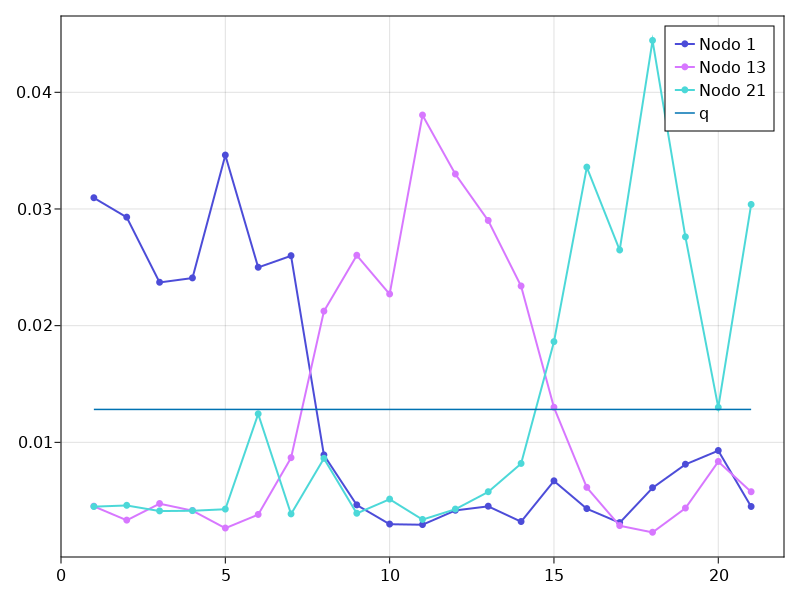

In [224]:
fig, ax, sp = series([proba[1,:],proba[13,:],proba[21,:]],
                    labels=["Nodo 1","Nodo 13","Nodo 21"],
                    marker=:circle)
lines!(ones(21)*(1/78),label="q")
# Axis(f[1, 1], xlabel = "x label", ylabel = "y label",
#     title = "Title")
axislegend(ax)
fig


In [155]:
plot(proba[1,:],markershapes=:circle)
plot!(proba[13,:],markershapes=:circle)
plot!(proba[21,:],markershapes=:circle)
plot!(ones(21)*(1/78))

Scatter{Tuple{Vector{Point{2, Float32}}}}

# Entropia